In [1]:
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer


data = pd.read_csv('DataSet_for_ANN.csv')
dataset = data
dataset[0:5]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
X, y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [709, 'France', 'Female', ..., 0, 1, 42085.58],
        [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
        [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object),
 array([1, 0, 1, ..., 1, 1, 0], dtype=int64))

In [3]:
import tensorflow as tf

In [4]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [6]:
X[:, 2] = le.fit_transform(X[:,2])

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
ann_model = tf.keras.models.Sequential()

In [13]:
ann_model.add(
    tf.keras.layers.Dense(
       units=6, activation='relu' 
    )
)

In [14]:
ann_model.add(
    tf.keras.layers.Dense(
       units=6, activation='relu' 
    )
)

In [15]:
ann_model.add(
    tf.keras.layers.Dense(
       units=1, activation='sigmoid' 
    )
)

In [20]:
ann_model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [24]:
results = ann_model.fit(
    X_train, y_train, batch_size=32, epochs=100
)

Epoch 1/100
250/250 [==============================] - 0s 718us/step - loss: 0.3391 - accuracy: 0.8593
Epoch 2/100
250/250 [==============================] - 0s 744us/step - loss: 0.3387 - accuracy: 0.8595
Epoch 3/100
250/250 [==============================] - 0s 712us/step - loss: 0.3387 - accuracy: 0.8593
Epoch 4/100
250/250 [==============================] - 0s 724us/step - loss: 0.3385 - accuracy: 0.8600
Epoch 5/100
250/250 [==============================] - 0s 724us/step - loss: 0.3385 - accuracy: 0.8599
Epoch 6/100
250/250 [==============================] - 0s 655us/step - loss: 0.3388 - accuracy: 0.8594
Epoch 7/100
250/250 [==============================] - 0s 736us/step - loss: 0.3384 - accuracy: 0.8610
Epoch 8/100
250/250 [==============================] - 0s 736us/step - loss: 0.3378 - accuracy: 0.8612
Epoch 9/100
250/250 [==============================] - 0s 725us/step - loss: 0.3381 - accuracy: 0.8615
Epoch 10/100
250/250 [==============================] - 0s 668us/step - l

250/250 [==============================] - 0s 728us/step - loss: 0.3353 - accuracy: 0.8634
Epoch 80/100
250/250 [==============================] - 0s 670us/step - loss: 0.3357 - accuracy: 0.8614
Epoch 81/100
250/250 [==============================] - 0s 764us/step - loss: 0.3351 - accuracy: 0.8618
Epoch 82/100
250/250 [==============================] - 0s 698us/step - loss: 0.3358 - accuracy: 0.8635
Epoch 83/100
250/250 [==============================] - 0s 672us/step - loss: 0.3355 - accuracy: 0.8621
Epoch 84/100
250/250 [==============================] - 0s 813us/step - loss: 0.3357 - accuracy: 0.8622
Epoch 85/100
250/250 [==============================] - 0s 711us/step - loss: 0.3347 - accuracy: 0.8639
Epoch 86/100
250/250 [==============================] - 0s 661us/step - loss: 0.3356 - accuracy: 0.8612
Epoch 87/100
250/250 [==============================] - 0s 776us/step - loss: 0.3350 - accuracy: 0.8641
Epoch 88/100
250/250 [==============================] - 0s 704us/step - loss:

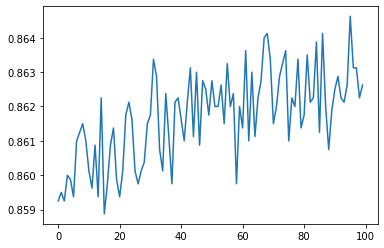

In [26]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])

In [23]:
print(ann_model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 600000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 57ms/step
[[ True]]


In [27]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

63/63 [==============================] - 0s 599us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
### Making the confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[1546   39]
 [ 236  179]]


0.8625

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# model = Sequentimodel.add(Dense(units=6, activation='relu'))al()

# model.add(Dense(units=6, activation='relu'))
# model.add(Dense(units=6, activation='sigmoid'))

# model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

# #ann.fit(X_train, y_train, batch_size=32, epochs = 100)
# results = model.fit(X_train, y_train, batch_size=32, epochs = 100)

In [ ]:
# ann = tf.keras.models.Sequential()
# ann.add(tf.keras.layers.Dense(
#     units=6, 
#     activation='relu'
# ))

In [ ]:
###Compiling  the ANN

In [ ]:
# ann.add(tf.keras.layers.Dense(
#     units=6, 
#     activation='sigmoidalna'
# ))

In [ ]:
# ann.compile(optimizer='adam',
#            loss='binary_crossentropy',
#            metrycs = ['accuracy'])

In [ ]:
###Training the ANN on the TRAIN set

In [ ]:
# #ann.fit(X_train, y_train, batch_size=32, epochs = 100)
# results = ann.fit(X_train, y_train, batch_size=32, epochs = 100)


In [ ]:
# ann.summary()